In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,confusion_matrix,r2_score
from sklearn.metrics import mean_absolute_error
from sklearn import preprocessing

### train_data 읽어들이기

In [2]:
dummy_data = pd.read_csv('./train-data.csv')
dummy_data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [3]:
dummy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


**행과 열의 개수를 파악하여 인스턴스 개수 확인**

In [4]:
dummy_data.shape

(6019, 14)

### 데이터 전처리

In [5]:
#NAN 결측치 제거
#df.copy()를 쓰는 이유는 원본 데이터의 유지보존을 위한 것이다. 별개의 복사본으로 생각하면 편하다.
clean_data = dummy_data.copy(deep = True)
clean_data.dropna('index').shape #(823,14)로 데이터의 손실이 너무 크다. dropna는 결측값이 있는 행 또는 열을 삭제한다.

#New_Price 컬럼의 이상치 확인
print(str(clean_data.New_Price.isna().sum()))

#New_Price, Unnamed 컬럼 미리 제거
clean_data.drop(columns=['Unnamed: 0','New_Price'], inplace=True)

clean_data.dropna('index',inplace=True)
clean_data = clean_data.reset_index(drop=True) # 인덱스 값 새롭게 리셋
clean_data.shape #(5975,12)개의 데이터로 줄임

5195


(5975, 12)

In [6]:
#차종류 수 정의 (np.unique는 중복되지 않는 고유한 값 리턴)
len(np.unique(list(clean_data.Name))) #1855가지 #overfitting 초래할 수도 있음

#브랜드 이름만 앞에 놥두고 뒤에 꼬리부터 삭제 (split을 쓰면 '앞내용','seperator 뒷내용'이 나오는데 그중 0번째 인덱스면 첫번째꺼)
names = list(clean_data.Name)
for i in range(len(names)):
    names[i]=names[i].split(' ',1)[0]
clean_data.Name = names
clean_data.head()

len(np.unique(list(clean_data.Name))) #31개 브랜드 

31

In [7]:
mileage = list(clean_data.Mileage)
engine = list(clean_data.Engine)
power = list(clean_data.Power)

for i in range(len(names)):
    mileage[i] = mileage[i].split(' ',1)[0]
    engine[i] = engine[i].split(' ',1)[0]
    power[i] = power[i].split(' ',1)[0]

clean_data.Mileage = mileage
clean_data.Engine = engine
clean_data.Power = power
clean_data.head() #숫자만 남기기 위해 뒷 단위 전부 삭제

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,1.75
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,4.50
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,17.74


In [8]:
clean_data.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
Price                float64
dtype: object

In [9]:
#각 컬럼별 데이터형 확인
clean_data["Kilometers_Driven"] = clean_data["Kilometers_Driven"].astype(float)
clean_data["Mileage"] = clean_data["Mileage"].astype(float)
clean_data["Engine"] = clean_data["Engine"].astype(float)
clean_data.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven    float64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                 object
Seats                float64
Price                float64
dtype: object

In [10]:
np.unique(list(clean_data.Name))

array(['Ambassador', 'Audi', 'BMW', 'Bentley', 'Chevrolet', 'Datsun',
       'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai', 'ISUZU', 'Isuzu',
       'Jaguar', 'Jeep', 'Lamborghini', 'Land', 'Mahindra', 'Maruti',
       'Mercedes-Benz', 'Mini', 'Mitsubishi', 'Nissan', 'Porsche',
       'Renault', 'Skoda', 'Smart', 'Tata', 'Toyota', 'Volkswagen',
       'Volvo'], dtype='<U13')

In [11]:
np.unique(list(clean_data.Location))

array(['Ahmedabad', 'Bangalore', 'Chennai', 'Coimbatore', 'Delhi',
       'Hyderabad', 'Jaipur', 'Kochi', 'Kolkata', 'Mumbai', 'Pune'],
      dtype='<U10')

In [12]:
np.unique(list(clean_data.Year))

array([1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

In [13]:
np.unique(list(clean_data.Fuel_Type))

array(['CNG', 'Diesel', 'LPG', 'Petrol'], dtype='<U6')

In [14]:
np.unique(list(clean_data.Transmission))

array(['Automatic', 'Manual'], dtype='<U9')

In [15]:
np.unique(list(clean_data.Owner_Type))

array(['First', 'Fourth & Above', 'Second', 'Third'], dtype='<U14')

In [16]:
np.unique(list(clean_data.Seats))

#0 제거하기
clean_data = clean_data[clean_data.Seats != 0]

In [17]:
print(clean_data.shape) #5975에서 5974로 Seats 0값 하나 줄어듬

(5974, 12)


In [18]:
np.unique(list(clean_data.Power))

array(['100', '100.6', '101', '102', '102.5', '102.53', '102.57', '103',
       '103.2', '103.25', '103.3', '103.5', '103.52', '103.6', '104',
       '104.68', '105', '105.5', '106', '107.2', '107.3', '108.4',
       '108.45', '108.49', '108.495', '108.5', '108.62', '110', '110.4',
       '110.5', '112', '112.2', '112.4', '113.98', '114', '114.4', '115',
       '116.3', '116.4', '116.6', '116.9', '117.3', '118', '118.3',
       '118.6', '120', '120.33', '120.7', '121.3', '121.36', '121.4',
       '122', '123.24', '123.37', '123.7', '125', '126.2', '126.24',
       '126.3', '126.32', '127', '130', '130.2', '130.3', '132', '134',
       '135.1', '136', '138', '138.02', '138.03', '138.08', '138.1',
       '139.01', '139.07', '140', '140.8', '141', '141.1', '142', '143',
       '144', '147.5', '147.51', '147.6', '147.8', '147.9', '148',
       '148.31', '149.92', '150', '152', '152.88', '153.86', '154', '155',
       '156', '157.7', '157.75', '157.8', '158', '158.2', '158.8', '160',
      

In [22]:
#Power 내의 null값 제거
idx = []
lt = list(clean_data['Power'])
for i in range(len(lt)):
    if(lt[i] == 'null'):
        idx.append(i)
clean_data = clean_data.drop(idx)
clean_data = clean_data.reset_index(drop=True)

In [20]:
clean_data.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven    float64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                 object
Seats                float64
Price                float64
dtype: object

In [24]:
clean_data['Power'] = clean_data['Power'].astype(float)

In [25]:
#카테고리컬로 분류
clean_data['Year'] = pd.Categorical(clean_data['Year'])
clean_data['Seats'] = pd.Categorical(clean_data['Seats'])

In [26]:
clean_data = pd.get_dummies(clean_data, prefix_sep='_', drop_first=True) #문자를 숫자로 바꾸어 One-hot-encoding

In [27]:
clean_data.head()

,Kilometers_Driven,Mileage,Engine,Power,Price,Name_Audi,Name_BMW,Name_Bentley,Name_Chevrolet,Name_Datsun,...,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Seats_4.0,Seats_5.0,Seats_6.0,Seats_7.0,Seats_8.0,Seats_9.0,Seats_10.0
0,72000.0,26.60,998.0,58.16,1.75,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,41000.0,19.67,1582.0,126.20,12.50,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,46000.0,18.20,1199.0,88.70,4.50,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,87000.0,20.77,1248.0,88.76,6.00,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,40670.0,15.20,1968.0,140.80,17.74,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0


In [28]:
print(clean_data.shape)

(5844, 79)


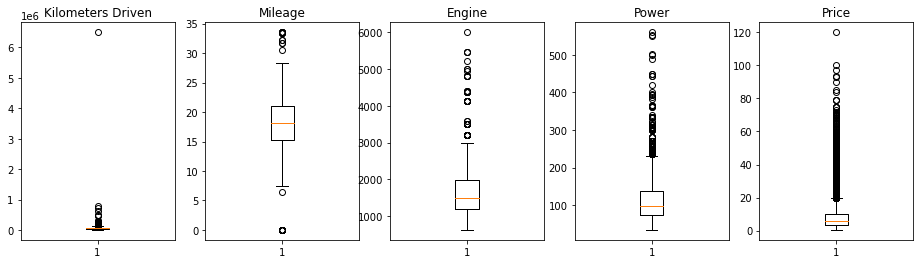

In [29]:
#Outlier(이상치) 확인하기
fig, ax = plt.subplots(1,5,figsize=(16,4))
ax[0].boxplot(list(clean_data.Kilometers_Driven))
ax[0].set_title('Kilometers Driven')

ax[1].boxplot(list(clean_data.Mileage))
ax[1].set_title('Mileage')

ax[2].boxplot(list(clean_data.Engine))
ax[2].set_title('Engine')

ax[3].boxplot(list(clean_data.Power))
ax[3].set_title('Power')

ax[4].boxplot(list(clean_data.Price))
ax[4].set_title('Price')

plt.show()

In [30]:
# kilo 6000000 삭제하기 (가중치 조절을 위해)
idx = []
lt = list(clean_data["Kilometers_Driven"])
for i in range(len(lt)):
    if(lt[i] > 1000000):
        idx.append(i)
clean_data = clean_data.drop(idx)
clean_data = clean_data.reset_index(drop=True)

In [31]:
clean_data.dtypes

Kilometers_Driven    float64
Mileage              float64
Engine               float64
Power                float64
Price                float64
                      ...   
Seats_6.0              uint8
Seats_7.0              uint8
Seats_8.0              uint8
Seats_9.0              uint8
Seats_10.0             uint8
Length: 79, dtype: object

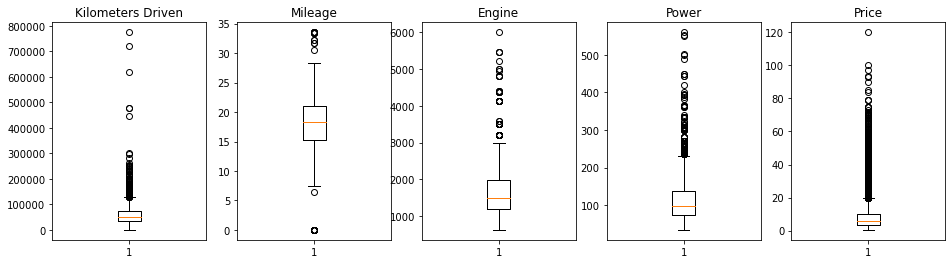

In [32]:
#Outlier(이상치) 확인하기
fig, ax = plt.subplots(1,5,figsize=(16,4))
ax[0].boxplot(list(clean_data.Kilometers_Driven))
ax[0].set_title('Kilometers Driven')

ax[1].boxplot(list(clean_data.Mileage))
ax[1].set_title('Mileage')

ax[2].boxplot(list(clean_data.Engine))
ax[2].set_title('Engine')

ax[3].boxplot(list(clean_data.Power))
ax[3].set_title('Power')

ax[4].boxplot(list(clean_data.Price))
ax[4].set_title('Price')

plt.show()

In [33]:
#train 데이터 형성
y = clean_data[['Price']].to_numpy() #ndarray 형태로 변경
print(y)
clean_data = clean_data.drop(columns=['Price'])

[[ 1.75]
 [12.5 ]
 [ 4.5 ]
 ...
 [ 2.9 ]
 [ 2.65]
 [ 2.5 ]]


In [34]:
x = clean_data.values #5행 78열
columns = clean_data.columns # 리스트값으로 열 레이블 반환

#X값만
scaler = preprocessing.MinMaxScaler() #최소 최대값을 구함
tmp = scaler.fit_transform(x) 
clean_data = pd.DataFrame(tmp)
clean_data.columns = columns

x = clean_data.to_numpy()

In [35]:
#데이터 나누기
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.85,random_state=1)

In [36]:
# 모델링 하기 = 다중선형회귀 사용
lr = LinearRegression(fit_intercept=True,normalize=True,copy_X=True)
lr.fit(x_train,y_train)

LinearRegression(normalize=True)

In [37]:
print(lr.score(x_train,y_train)) #성능치 표현 (0~1) 높아지면 좋은 것!

0.8011629967783105


In [38]:
x_train.shape

(4966, 78)

In [39]:
x_test.shape

(877, 78)

In [40]:
y_predict = lr.predict(x_test)

In [41]:
print('Test accuracy : ',format(lr.score(x_test,y_test)))
print('Test accuracy : ',format(r2_score(y_test,y_predict)))

Test accuracy :  0.8107960180975307
Test accuracy :  0.8107960180975307


In [42]:
mean_absolute_error(y_test,y_predict)

2.962403198014467

29만6천루피(=한화 480만원)